VALCANO - 1
Observations - 12


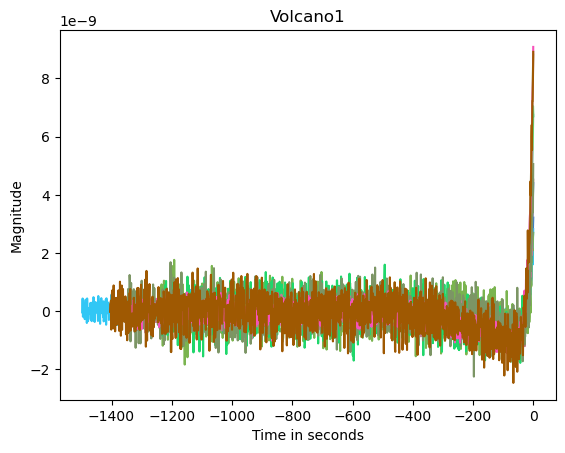

VALCANO - 2
Observations - 27


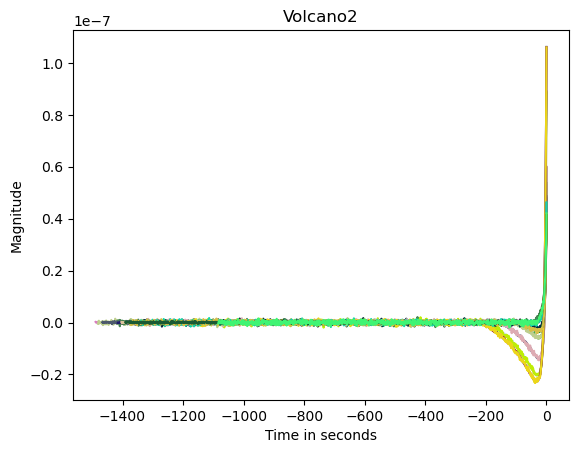

VALCANO - 3
Observations - 30


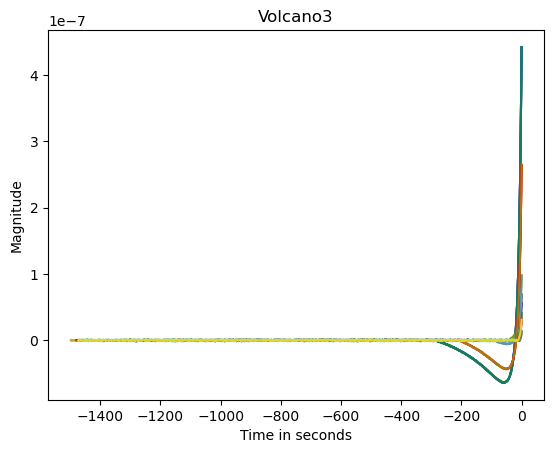

VALCANO - 4
Observations - 15


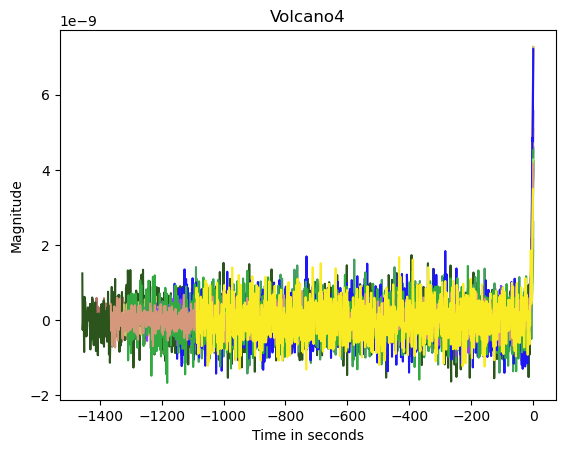

VALCANO - 5
Observations - 3


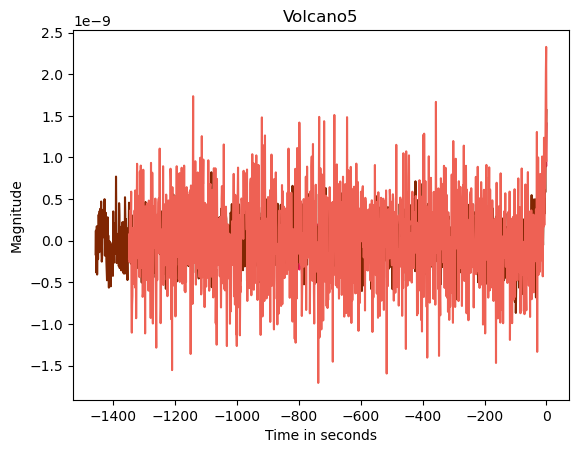

VALCANO - 6
Observations - 27


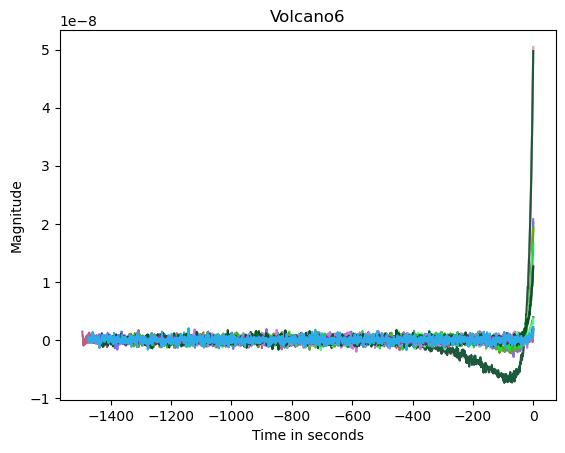

VALCANO - 7
Observations - 12


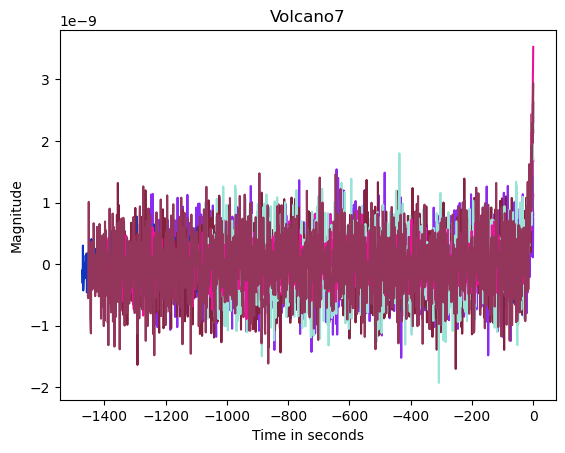

VALCANO - 8
Observations - 21


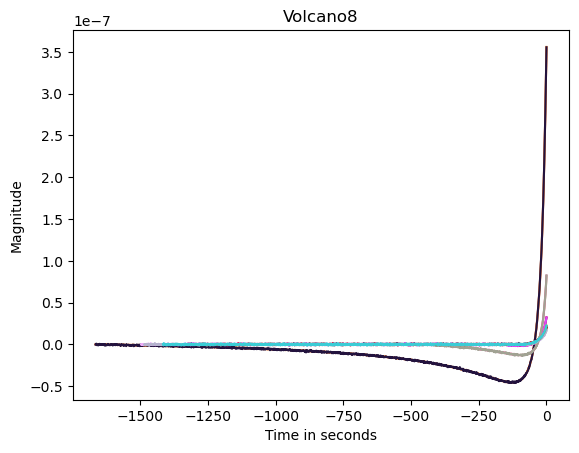

VALCANO - 9
Observations - 12


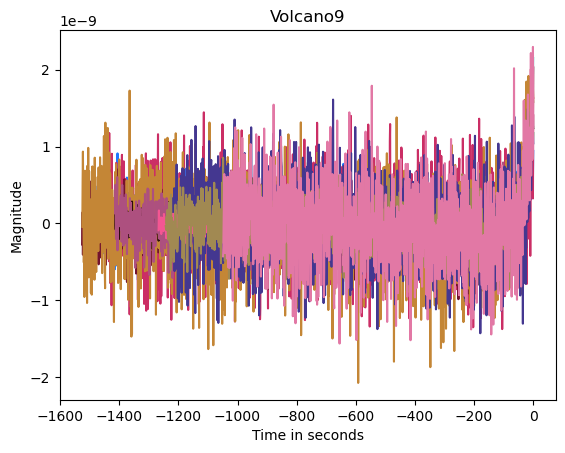

VALCANO - 10
Observations - 30


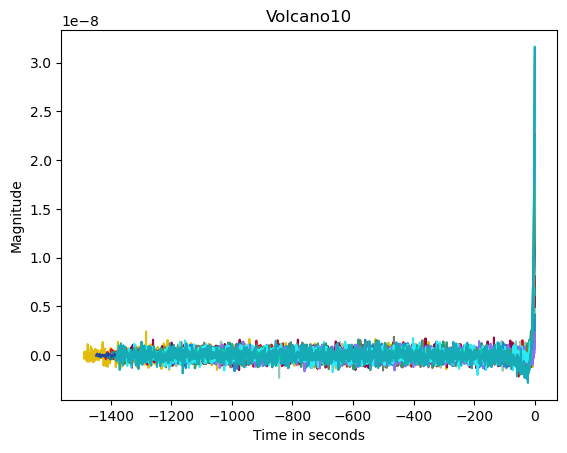

,v,patm,g,r,G,rho,mu,rc,M,sigma,tilt_erupt,volcano
0,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.18,0.10,3.1271,1
1,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.18,0.25,3.1271,1
2,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.18,0.50,3.1271,1
3,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.4,0.10,6.8325,1
4,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.4,0.25,6.8325,1
5,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.4,0.50,6.8325,1
6,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.26,0.10,4.3569,1
7,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.26,0.25,4.3569,1
8,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.26,0.50,4.3569,1
9,0.25,100000.0,9.81,500.0,10^11.12,2200.0,10^3.51,18.0,10^6.48,0.10,8.9704,1


In [26]:
# Plotting our initial data of time series
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
data = {
    "v": [],
    "patm": [],
    "g": [],
    "r": [],
    "G": [],
    "rho": [],
    "mu": [],
    "rc": [],
    "M": [],
    "sigma": [],
    "tilt_erupt": [],
    "volcano": [],
}

df = pd.DataFrame(data)
xtime = []
xsensor =[]

def volcanoData():
    for folder in range(1,10+1):
        print(f"VALCANO - {folder}")
        initial_count = 0
        dir = (f"C:\\Users\\crims\\Desktop\\ML Assignment\\Volcano_Dataset\\Volcano{folder}")
        for path in os.listdir(dir):
            if os.path.isfile(os.path.join(dir, path)):
                initial_count += 1
        print(f"Observations - {initial_count}")
        for x in range(1,initial_count+1):
            f = open(f"C:\\Users\\crims\\Desktop\\ML Assignment\\Volcano_Dataset\\Volcano{folder}\\observation{x}.txt")
            lines = f.read().splitlines()
            main = [l for l in lines if l != " "]
            tempP = main[-1].split(",")
            p = [float(str(e)) for e in tempP]
            tempT = main[-2].split(",")
            t = [int(time) for time in tempT]     
            v = float(main[0].split(",")[-1])
            patm = float(main[1].split(",")[-1])
            g = float(main[2].split(",")[-1])
            r = float(main[3].split(",")[-1])
            G = (main[4].split(",")[-1])
            rho = float(main[5].split(",")[-1])
            mu = (main[6].split(",")[-1])
            rc = float(main[7].split(",")[-1])
            M = (main[8].split(",")[-1])
            sigma = float(main[9].split(",")[-1])
            tilt_erupt = float(main[10].split(",")[-1][:-4])
            df.loc[len(df.index)] = [v,patm,g,r,G,rho,mu,rc,M,sigma,tilt_erupt,folder]
            plt.plot(t, p,c=np.random.rand(3,))
            plt.title(f"Volcano{folder}")
            plt.ylabel("Magnitude")
            plt.xlabel("Time in seconds")
            f.close()
        plt.show()
        
volcanoData()
df.head(10)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
import os
import math
def FeatureEngineering(folder,mainDF):
    print(f"VALCANO - {folder}")
    initial_count = 0
    dir = (f"C:\\Users\\crims\\Desktop\\ML Assignment\\Volcano_Dataset\\Volcano{folder}")
    for path in os.listdir(dir):
        if os.path.isfile(os.path.join(dir, path)):
            initial_count += 1
# Only considering half of the observations in each volcano folder as this is compute intensive and
# can easily be scaled by considering all the observations of a give volcano
    print(f"Observations Considered - {math.ceil(initial_count/2)}")
    for x in range(1,math.ceil(initial_count/2)):
# change the path as per your folder path where this project folder is located
        f = open(f"C:\\Users\\crims\\Desktop\\ML Assignment\\Volcano_Dataset\\Volcano{folder}\\observation{x}.txt")
        lines = f.read().splitlines()
        main = [l for l in lines if l != " "]
        tempP = main[-1].split(",")
        p = [float(str(e)) for e in tempP]
        for idx,x in enumerate(p):
            if idx + 300 < len(p):
                instance = [p[i] for i in range(idx,idx+300)]
                instance.append(p[-1])
                instance.append(len(p)-(idx+300))
                mainDF.loc[len(mainDF.index)] = instance
    return math.ceil(initial_count/2)           

def metric(y_test,y_pred):
    mse = mean_squared_error(y_test.to_numpy(),y_pred,squared=False,multioutput= 'raw_values')
    variance_score = explained_variance_score(y_test.to_numpy(), y_pred,multioutput = 'raw_values')
    r2 = r2_score(y_test.to_numpy(),y_pred, multioutput ="raw_values")
    mae = mean_absolute_error(y_test.to_numpy(),y_pred, multioutput ="raw_values")
    return mse,variance_score,r2,mae

In [29]:
# Q1 outputs and Q2 outputs are both taken in this model
# Data set Format
# X1 X2 X3 . . . . X300 // Y1 Y2
# where Xs are the consecutive sensor values forming a chain of length 300 sensor values per sample
# Y1 is the sensor value at time = 0
# Y2 is the time in seconds which is remaining until the Eruption 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,cross_val_score
from IPython.display import display
import pandas as pd
modelPerVolcano = []
for f in range(1,10+1):
    print(f"Building Model for Volcano {f}")
    mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
# Actually building our dataset 
    o = FeatureEngineering(f,mainDF)
# just shuffling the sample, not really required
    mainDF = mainDF.sample(frac=1)
    inputDF = mainDF.iloc[:,:-2]
    outputDF = mainDF.iloc[:,300:302]
    display(mainDF.head(5))
    x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
    kf = KFold(n_splits = 5)
# We can make the model better with different combinations of params, I had left it empty for faster model training
    params = {}
    model = LinearRegression()
    gv = GridSearchCV(model,param_grid=params,scoring = 'neg_mean_absolute_error',cv = kf)
    gv.fit(x_train,y_train)
    model = gv.best_estimator_
    y_pred = model.predict(x_test)
# evaluating a few metrics
    mse,variance_score,r2,mae = metric(y_test,y_pred)
    modelPerVolcano.append({"volcano": f,'model':model,'observationsConsidered' : o ,'neg_mean_absolute' :gv.best_score_,"mse":mse,"variance_score":variance_score,"r2":r2,"mae":mae})
for m in modelPerVolcano:
    for key,value in m.items():
        print(f"{key} : {value}")
    print()
#saving models
import joblib
for i,m in enumerate(modelPerVolcano):
    model = m["model"]
    filename = "Q1Q2Models\\volcano"+str(m['volcano'])+".joblib"
    print(f"Saving Model {i}")
    joblib.dump(model, filename)

Building Model for Volcano 1
VALCANO - 1
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
4400,1.556903e-13,6.437192e-11,-2.989950e-10,-1.913261e-10,-8.691053e-11,-2.198862e-10,-1.568531e-10,-4.117094e-10,-4.735132e-10,1.253570e-10,...,-9.814294e-10,-9.854785e-10,-4.830842e-10,-1.171592e-09,-6.298899e-10,-9.070340e-10,-9.647900e-10,-8.836572e-10,7.016951e-09,97.0
1284,1.408143e-10,1.521196e-10,-5.902147e-10,2.939285e-11,-6.815049e-11,2.821692e-10,-5.663475e-11,2.192173e-10,-2.044516e-10,-2.567450e-10,...,-1.557988e-11,7.231716e-11,-3.764993e-11,2.356046e-10,-1.954301e-10,-1.386068e-11,3.538432e-10,-1.577429e-10,2.822080e-09,669.0
1907,-3.268401e-10,5.999196e-11,-2.824372e-11,-4.311234e-11,-1.980092e-10,-1.886003e-10,4.913855e-10,4.647715e-11,-9.107309e-11,2.052959e-10,...,-1.106451e-09,-6.535123e-10,-6.082798e-10,-7.147144e-10,-3.455340e-10,-3.734324e-10,-3.075491e-10,-7.380167e-10,2.822080e-09,46.0
1305,-6.177876e-11,-2.839406e-10,5.507863e-11,3.157208e-10,-2.672008e-10,3.428622e-10,2.228709e-10,1.184793e-10,-7.438668e-11,-1.717122e-10,...,1.943166e-10,-1.936482e-10,-6.970658e-11,-1.576895e-10,1.116964e-10,-3.801436e-11,-2.815879e-10,7.256407e-12,2.822080e-09,648.0
3439,-1.216023e-10,-6.922910e-11,2.961530e-10,5.427775e-11,-1.559450e-10,-3.551037e-12,-2.784149e-11,5.391471e-11,-1.523680e-10,2.970583e-11,...,-4.176075e-10,-2.627153e-10,-4.383730e-10,-4.490771e-10,-3.591776e-10,-3.984332e-10,-5.117555e-10,-2.967676e-10,6.749010e-09,192.0


Building Model for Volcano 2
VALCANO - 2
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
11163,-1.740028e-10,-1.688446e-10,-5.716295e-10,2.363607e-10,-3.835144e-10,4.844229e-10,9.882666e-10,1.780947e-10,-3.676471e-10,1.322657e-10,...,-9.891073e-10,-8.015431e-11,-1.091230e-11,3.511122e-10,5.793323e-10,2.058612e-10,-6.532296e-12,-4.826513e-10,4.864101e-08,775.0
8359,-3.132117e-10,-8.047456e-10,-4.698099e-10,-6.260009e-10,3.485868e-11,4.076499e-11,6.508130e-10,8.963049e-10,6.085875e-10,7.483398e-10,...,-6.549022e-10,-2.182943e-10,-4.734097e-11,-2.782209e-10,-7.739516e-10,5.718467e-10,6.258783e-11,8.736209e-10,4.311601e-08,307.0
3496,-1.442416e-10,2.686888e-11,1.438471e-12,2.132135e-10,1.350940e-12,5.639364e-11,-5.340378e-11,-5.920277e-11,-5.178006e-11,9.182341e-11,...,-5.499060e-09,-5.295517e-09,-5.154449e-09,-4.699122e-09,-4.615618e-09,-4.182732e-09,-3.684739e-09,-2.992220e-09,5.313953e-08,12.0
626,3.748287e-11,-1.697807e-10,-1.590615e-12,-1.956192e-10,-8.104000e-11,1.228341e-10,6.349530e-11,1.717471e-11,1.680918e-10,7.196418e-11,...,2.019805e-10,3.521160e-11,1.455186e-10,-8.000820e-11,-5.202618e-11,9.232220e-11,-4.060491e-11,3.351321e-11,8.908291e-08,565.0
8326,7.367492e-10,4.526844e-10,3.328470e-11,-5.303804e-10,-3.436111e-11,-3.034090e-10,-3.962307e-10,-5.789788e-10,-7.792361e-10,-2.980141e-10,...,-1.900116e-12,-3.030435e-10,-1.007592e-10,2.089306e-10,1.146879e-10,-6.065747e-10,-7.456641e-10,-4.851165e-10,4.311601e-08,340.0


Building Model for Volcano 3
VALCANO - 3
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
5406,-4.263661e-10,-5.319833e-10,-7.878901e-11,-4.856456e-10,1.452994e-09,6.666361e-10,-7.331588e-10,-1.397324e-10,-1.635621e-10,1.801976e-10,...,-1.614931e-09,-2.741361e-10,6.973726e-10,6.721261e-10,1.871207e-10,-7.172648e-10,5.118865e-10,1.111060e-09,4.416627e-07,537.0
2340,1.822437e-10,-2.966910e-11,-1.597452e-10,-3.626191e-10,-3.661928e-10,7.159663e-10,-7.157138e-10,-2.900600e-10,1.958230e-10,-2.023762e-13,...,1.495176e-10,2.896347e-10,-9.322392e-11,5.958579e-10,1.896140e-10,5.037382e-10,-7.046101e-11,1.472550e-10,3.806391e-08,517.0
2472,8.399338e-11,-5.616994e-10,5.298535e-10,-1.332166e-10,3.082555e-10,1.373346e-10,3.710851e-10,-4.504291e-10,-1.977748e-10,1.152975e-10,...,3.438714e-10,-6.800543e-10,1.068235e-11,-4.306103e-10,1.349720e-10,-3.644384e-11,-4.658796e-10,7.179846e-10,3.806391e-08,385.0
6025,1.685861e-11,8.089356e-11,-2.128689e-11,2.046734e-11,-9.955519e-11,-6.437603e-11,2.239207e-11,7.545358e-11,6.065279e-11,9.756795e-12,...,-3.690421e-11,1.158212e-10,2.337637e-11,6.094363e-11,1.412180e-10,1.681638e-10,-3.251807e-11,-1.855154e-11,4.423591e-07,690.0
11481,3.022637e-10,-1.297825e-11,4.628518e-10,-3.449794e-10,-9.915667e-10,3.515308e-10,-5.674123e-10,-7.347969e-10,-1.734037e-10,-3.805917e-10,...,-1.437701e-10,9.306009e-11,-6.078845e-10,9.203810e-11,4.166607e-10,2.917555e-10,-1.055500e-10,1.411493e-10,5.665841e-08,132.0


Building Model for Volcano 4
VALCANO - 4
Observations Considered - 8


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
720,1.149397e-10,-1.357290e-10,-4.989606e-11,-6.062853e-11,-5.600836e-11,-8.445821e-11,-8.877738e-11,2.100966e-10,-1.917999e-11,-3.090420e-11,...,-1.354274e-10,-5.505388e-11,3.212625e-12,-2.705737e-11,2.495477e-11,1.290671e-10,-1.597476e-10,7.619015e-11,5.564856e-09,123.0
5561,4.212594e-10,-5.341602e-10,2.611843e-10,-3.820660e-10,5.394119e-11,4.750739e-10,7.678563e-10,1.038002e-09,5.716641e-10,1.367058e-10,...,2.991009e-10,7.799684e-11,-3.169928e-10,-8.416249e-10,2.430655e-10,6.257827e-11,-3.110271e-10,6.423897e-10,2.602876e-09,75.0
1291,2.474524e-11,1.058042e-10,3.685182e-11,-4.042944e-10,3.371042e-10,2.623923e-10,-7.698764e-11,4.372678e-11,-1.164948e-10,7.161755e-11,...,-1.209149e-10,8.374446e-12,8.312391e-12,8.422110e-11,-5.649008e-10,1.683206e-11,-9.636592e-12,-3.372249e-10,5.086692e-09,683.0
2952,7.512929e-10,-4.369626e-10,2.121678e-10,-1.538014e-09,7.760256e-11,1.092250e-10,-2.841035e-10,2.948988e-10,-2.737579e-11,-6.967575e-11,...,-1.702358e-10,-3.365823e-10,5.821529e-11,2.822737e-10,-4.119038e-10,9.903523e-10,-4.876761e-10,1.665098e-10,4.597208e-09,180.0
156,-1.839661e-10,4.597354e-11,7.903827e-11,1.895461e-11,1.336309e-10,7.036523e-12,1.116661e-11,1.444562e-10,-1.645961e-10,8.960422e-11,...,-7.709720e-11,1.567287e-11,-4.747560e-11,4.401396e-11,8.566040e-11,4.490995e-11,8.431116e-11,1.853134e-10,5.564856e-09,687.0


Building Model for Volcano 5
VALCANO - 5
Observations Considered - 2


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
153,-1.794197e-10,-2.591213e-11,5.870258e-11,1.790524e-10,-9.956739e-11,-6.529740e-12,6.576557e-11,1.814630e-11,9.861475e-12,-1.002382e-10,...,8.595349e-11,9.187417e-11,6.835286e-12,7.641169e-11,-5.438391e-11,7.521843e-11,-2.430725e-11,1.142726e-11,1.408026e-09,745.0
156,1.790524e-10,-9.956739e-11,-6.529740e-12,6.576557e-11,1.814630e-11,9.861475e-12,-1.002382e-10,-9.794040e-11,-3.318145e-12,3.001923e-11,...,7.641169e-11,-5.438391e-11,7.521843e-11,-2.430725e-11,1.142726e-11,2.049560e-11,1.288569e-11,-9.514276e-12,1.408026e-09,742.0
30,1.983113e-11,1.492331e-10,-1.018533e-11,9.412919e-11,-1.410661e-11,1.150556e-10,-3.394078e-11,-7.940152e-11,9.942473e-11,1.735423e-10,...,-6.908792e-12,-1.889790e-10,2.978153e-11,-1.004785e-10,-2.376158e-11,5.665621e-11,-1.500036e-11,-7.834381e-11,1.408026e-09,868.0
650,-1.592160e-10,-3.431157e-11,-4.753756e-11,8.993721e-11,6.616151e-14,3.507012e-11,-3.401727e-11,3.673917e-11,-8.438057e-11,-1.436151e-10,...,2.883217e-11,-3.552019e-11,-1.885102e-11,-8.804990e-12,-1.121711e-10,6.586395e-11,-6.024636e-11,-2.188479e-11,1.408026e-09,248.0
187,-1.110092e-10,-4.830090e-11,-6.112024e-11,3.749180e-11,-7.449809e-11,-1.487531e-10,1.521261e-11,2.279357e-11,1.979135e-10,-1.152777e-10,...,5.634621e-11,4.467935e-11,5.435769e-11,-6.373308e-11,-8.645018e-11,3.065346e-11,1.639765e-10,-7.773366e-12,1.408026e-09,711.0


Building Model for Volcano 6
VALCANO - 6
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
3873,2.800362e-10,1.127945e-10,-8.363488e-12,8.155405e-11,-4.388959e-10,2.637378e-11,-5.557903e-11,1.330695e-10,-2.455328e-12,4.632648e-11,...,-2.554326e-10,-3.518403e-10,5.491772e-11,-3.789728e-10,-1.596636e-10,-1.128730e-10,-2.727414e-10,2.291903e-11,1.510957e-09,77.0
4545,-1.410885e-09,1.141100e-10,-6.452077e-10,4.476402e-10,9.771045e-10,-5.222080e-10,5.380985e-11,1.045361e-09,-4.414811e-10,-2.929784e-10,...,3.201072e-11,6.034653e-10,3.634506e-10,-4.220139e-10,7.481749e-10,-1.189041e-09,1.097779e-10,-9.389030e-10,8.159412e-10,601.0
9770,-7.215883e-10,2.865272e-10,3.781688e-10,2.940904e-10,7.904341e-11,-7.000097e-10,-1.656191e-11,-2.627254e-10,5.184334e-11,-4.057426e-10,...,-5.658965e-10,-8.181938e-10,-1.563542e-11,6.486138e-10,-4.504495e-10,6.412534e-10,4.059205e-10,-4.093062e-10,2.079598e-08,746.0
6636,3.732415e-10,-9.650363e-11,-4.992259e-10,4.634345e-11,3.940986e-10,3.045514e-10,2.723191e-10,-1.530276e-10,-2.823668e-10,4.245329e-11,...,-2.553067e-10,7.837487e-11,7.740639e-11,-4.755189e-10,-3.505529e-10,-6.617073e-12,1.093218e-10,2.418308e-10,3.850436e-09,211.0
8508,-1.157429e-10,2.888348e-10,-1.358327e-10,-1.987155e-10,-5.039053e-11,-1.601661e-10,-2.049800e-10,2.448768e-10,-2.163977e-10,-2.144277e-10,...,4.263146e-11,1.826003e-10,1.041950e-10,-2.072885e-10,-3.505450e-10,5.651894e-10,-2.109534e-10,-1.800307e-10,2.018644e-08,861.0


Building Model for Volcano 7
VALCANO - 7
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
5137,-2.834153e-10,-2.936889e-10,1.490473e-11,2.001080e-10,-4.822066e-10,-2.454690e-11,9.596849e-11,1.533944e-10,1.524065e-10,1.372655e-10,...,9.323033e-11,3.756179e-11,-1.984437e-10,-9.393571e-11,-3.693749e-10,9.347429e-12,-3.474829e-10,2.092296e-10,2.305691e-09,49.0
1854,1.743884e-10,4.471995e-10,-4.173850e-11,-9.226166e-11,4.187959e-10,4.591644e-10,1.523839e-10,2.060951e-10,3.484547e-10,4.135891e-10,...,-1.544482e-10,-1.670533e-10,1.937221e-10,-2.905386e-10,5.080606e-11,-1.797795e-10,-1.102126e-10,-1.482948e-11,7.952452e-10,41.0
25,-3.842961e-11,-7.633621e-11,3.923899e-11,3.284517e-11,-2.678451e-11,3.015885e-11,-2.487112e-11,-4.351403e-11,1.486774e-10,-2.625241e-11,...,1.179494e-10,-5.506481e-11,7.579141e-11,-3.018269e-11,4.269470e-11,-3.617878e-11,-9.669281e-11,-3.424303e-11,1.130550e-09,1038.0
2585,-3.059649e-10,3.946462e-10,1.052584e-11,1.012931e-10,6.808983e-10,3.344707e-10,-4.859455e-10,-7.592981e-10,-5.079923e-10,-5.196927e-10,...,-2.627164e-10,-9.101514e-10,-1.292004e-10,-1.784895e-10,-1.970672e-10,4.338615e-10,7.812568e-10,-5.705813e-10,7.367720e-10,270.0
4680,-1.644227e-10,-1.905616e-10,1.009476e-10,1.387045e-10,1.032195e-10,-2.776779e-10,1.483339e-10,3.782875e-10,-3.714925e-10,-8.245175e-11,...,-3.310088e-10,-4.620052e-11,2.444170e-10,3.874989e-10,-2.476094e-10,1.029042e-10,-3.947666e-10,1.285589e-10,2.305691e-09,506.0


Building Model for Volcano 8
VALCANO - 8
Observations Considered - 11


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
7450,4.720187e-11,-1.013619e-10,2.403411e-10,1.464876e-10,-1.525908e-10,4.371158e-11,1.478219e-10,-8.843637e-11,-1.842773e-11,9.290687e-11,...,9.463300e-12,9.278435e-11,3.991217e-11,7.975019e-12,5.434969e-12,-4.210265e-11,-9.096040e-11,6.876943e-11,1.949651e-08,384.0
8851,-3.145653e-10,-1.010448e-11,-2.805273e-10,-1.321427e-10,6.271375e-10,3.290497e-10,4.874914e-10,6.209034e-10,1.246638e-10,-1.724448e-10,...,-4.389464e-10,-8.893131e-11,3.671168e-10,-1.060189e-10,3.063266e-10,-2.793577e-11,-7.611005e-10,1.367520e-10,1.964273e-08,648.0
2051,-5.865462e-09,-6.597702e-09,-6.597683e-09,-6.133056e-09,-6.154985e-09,-6.098272e-09,-6.342733e-09,-5.811279e-09,-6.356762e-09,-6.358384e-09,...,-1.273547e-08,-1.205195e-08,-1.230688e-08,-1.211447e-08,-1.196476e-08,-1.214679e-08,-1.246784e-08,-1.233373e-08,3.558351e-07,681.0
934,-1.100247e-08,-1.092741e-08,-1.091711e-08,-1.111569e-08,-1.111943e-08,-1.105474e-08,-1.116508e-08,-1.114069e-08,-1.111343e-08,-1.126729e-08,...,-2.152669e-08,-2.154331e-08,-2.163436e-08,-2.166299e-08,-2.157129e-08,-2.166718e-08,-2.191602e-08,-2.180242e-08,3.553866e-07,432.0
2223,-9.648492e-09,-9.023223e-09,-9.279149e-09,-9.403799e-09,-9.507266e-09,-9.397523e-09,-9.673880e-09,-9.062128e-09,-9.519674e-09,-9.598125e-09,...,-1.813177e-08,-1.792822e-08,-1.780851e-08,-1.779578e-08,-1.818022e-08,-1.798393e-08,-1.805842e-08,-1.791060e-08,3.558351e-07,509.0


Building Model for Volcano 9
VALCANO - 9
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
5557,-2.176331e-10,1.138540e-10,-2.436820e-10,2.630133e-10,-2.742772e-11,-4.738247e-10,2.516945e-10,-3.306702e-10,-3.393681e-11,-3.156625e-10,...,-6.021017e-11,-4.000334e-10,-3.361106e-10,-5.756154e-10,-7.090786e-10,-7.366639e-11,-2.425255e-10,-2.674705e-11,2.029917e-09,267.0
3733,-8.212415e-12,2.496844e-11,2.519083e-11,4.769925e-11,-3.998299e-11,9.176089e-11,5.196944e-13,1.406895e-10,-8.089908e-11,-1.023486e-10,...,-1.768432e-10,-8.194339e-11,-1.199769e-10,-1.404313e-10,-3.250290e-11,-1.803344e-12,-1.219101e-11,-8.104217e-11,2.152980e-09,865.0
1318,-2.000941e-10,-1.366815e-10,9.342169e-11,4.541963e-10,-1.294825e-10,-3.105544e-10,1.125026e-10,4.921458e-11,-1.910876e-10,1.157549e-10,...,-9.524511e-11,-9.343600e-11,-1.777347e-10,1.467155e-10,6.773618e-11,-3.216228e-10,-1.283387e-10,-2.260299e-11,9.436075e-10,917.0
573,-1.099706e-10,-1.611695e-11,-7.971217e-11,-2.258332e-12,8.370303e-12,4.232798e-11,-1.013182e-10,1.753767e-11,3.772265e-11,3.041596e-11,...,-1.129860e-12,-1.177630e-10,-1.611577e-10,-8.756768e-11,1.250025e-11,9.255290e-11,-9.567740e-11,-1.016556e-10,1.176197e-09,469.0
4508,-3.033533e-10,-1.652926e-10,-1.609806e-10,-3.361207e-10,-8.599869e-11,-1.091312e-10,-2.293850e-10,-1.085214e-10,-1.166472e-10,-1.585573e-10,...,-2.717744e-10,-2.896645e-10,-1.247300e-10,-1.281676e-10,1.215046e-10,-2.065662e-10,-2.051991e-10,-3.895882e-11,2.152980e-09,90.0


Building Model for Volcano 10
VALCANO - 10
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
1166,-3.692400e-10,-1.627335e-10,1.165685e-10,6.759749e-11,-3.358807e-10,3.478043e-10,5.854107e-10,2.247869e-10,-2.942762e-10,1.214618e-10,...,1.886791e-10,-9.318093e-11,2.992829e-10,4.300745e-11,-1.001363e-10,-3.497959e-11,6.132511e-10,1.696535e-10,2.564082e-09,895.0
1641,3.009690e-10,9.574904e-11,-3.429811e-11,-1.360828e-10,1.664095e-10,1.885035e-10,-3.862253e-11,3.932245e-10,-1.197776e-10,4.396875e-11,...,-9.533687e-11,-3.160085e-10,3.818549e-10,8.130213e-11,-1.896715e-10,1.084055e-10,-2.314763e-12,4.355319e-12,2.564082e-09,420.0
1178,-1.606148e-10,-1.451302e-13,1.123958e-11,-7.324703e-11,3.386858e-10,7.021860e-10,8.551683e-12,-1.373156e-10,5.573783e-10,-5.109693e-10,...,-5.645726e-10,-1.008657e-10,3.319609e-10,3.064320e-10,4.789613e-10,-1.720497e-10,2.164277e-10,-4.314675e-10,2.564082e-09,883.0
10005,7.986741e-11,4.128231e-11,-7.344702e-11,2.627527e-11,9.395551e-11,-7.910121e-11,-1.187276e-10,-3.713111e-11,1.281431e-10,2.017839e-10,...,-7.298696e-11,-5.522493e-11,-7.370714e-11,6.264201e-11,-1.223616e-10,-1.609929e-11,-2.259984e-11,3.283225e-11,6.559697e-09,53.0
3720,6.131860e-11,-4.633898e-12,-5.780542e-11,-1.218923e-10,-1.778267e-11,1.588439e-10,1.456777e-10,1.361230e-10,-1.679893e-10,9.928061e-11,...,-2.974098e-11,-6.131945e-11,-3.146917e-11,3.518240e-11,9.716011e-11,-2.373399e-11,-2.878105e-12,1.797767e-10,8.083670e-09,615.0


volcano : 1
model : LinearRegression()
observationsConsidered : 6
neg_mean_absolute : -97.57778057982007
mse : [1.94814466e-09 2.41239771e+02]
variance_score : [-0.03123205  0.30518383]
r2 : [-0.03335851  0.30409217]
mae : [1.75670110e-09 1.93904039e+02]

volcano : 2
model : LinearRegression()
observationsConsidered : 14
neg_mean_absolute : -122.3613398242079
mse : [1.65646222e-08 2.94893507e+02]
variance_score : [0.02208243 0.09224182]
r2 : [0.02190775 0.09111543]
mae : [1.30414009e-08 2.44953506e+02]

volcano : 3
model : LinearRegression()
observationsConsidered : 15
neg_mean_absolute : -109.48190136211397
mse : [1.91013411e-07 2.74222673e+02]
variance_score : [0.09854558 0.17476368]
r2 : [0.09832661 0.17456918]
mae : [1.75295522e-07 2.21066750e+02]

volcano : 4
model : LinearRegression()
observationsConsidered : 8
neg_mean_absolute : -126.69547319192353
mse : [1.77968090e-09 2.89567855e+02]
variance_score : [-0.01270171 -0.01879843]
r2 : [-0.01278633 -0.02246905]
mae : [1.56530128e-

In [31]:
# Training with Q1 outputs only
# given a time series predict the magnitude at 0 seconds 
# Data set Format
# X1 X2 X3 . . . . X300 // Y1
# where Xs are the consecutive sensor values forming a chain of length 300 sensor values per sample
# Y1 is the sensor value at time = 0

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,cross_val_score
from IPython.display import display
import pandas as pd
modelPerVolcano = []
for f in range(1,10+1):
    print(f"Building Model for Volcano {f}")
    mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
# Actually building our dataset 
    o = FeatureEngineering(f,mainDF)
# just shuffling the sample, not really required
    mainDF = mainDF.sample(frac=1)
    inputDF = mainDF.iloc[:,:-2]
    outputDF = mainDF.iloc[:,300:301]
    display(mainDF.head())
    x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
    kf = KFold(n_splits = 5)
# We can make the model better with different combinations of params, I had left it empty for faster model training
    params = {}
    model = LinearRegression()
    gv = GridSearchCV(model,param_grid=params,scoring = 'neg_mean_absolute_error',cv = kf)
    gv.fit(x_train,y_train)
    model = gv.best_estimator_
    y_pred = model.predict(x_test)
# evaluating a few metrics
    mse,variance_score,r2,mae = metric(y_test,y_pred)
    modelPerVolcano.append({"volcano": f,'model':model,'observationsConsidered' : o ,'neg_mean_absolute' :gv.best_score_,"mse":mse,"variance_score":variance_score,"r2":r2,"mae":mae})
for m in modelPerVolcano:
    for key,value in m.items():
        print(f"{key} : {value}")
    print()
#saving models
import joblib
for i,m in enumerate(modelPerVolcano):
    model = m["model"]
    filename = "Q1Models\\volcano"+str(m['volcano'])+"Q"+str(1)+".joblib"
    print(f"Saving Model {i+1} For Q1")
    joblib.dump(model, filename)

Building Model for Volcano 1
VALCANO - 1
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
1955,3.201688e-10,1.518963e-10,6.563347e-10,-1.183180e-09,3.562277e-10,2.868958e-10,-2.094268e-10,1.050597e-09,-5.010006e-10,1.644989e-10,...,-8.008955e-10,2.275128e-10,-4.526296e-10,-3.930894e-10,3.717404e-10,-3.894383e-10,-3.972062e-11,6.714349e-10,2.693709e-09,935.0
3380,1.270721e-11,8.412653e-11,4.421989e-11,-5.662086e-12,-1.048487e-11,-3.703649e-11,-9.622915e-11,1.263278e-11,7.517887e-11,4.977174e-11,...,-2.979645e-10,-2.249916e-10,-1.776943e-10,-2.566622e-10,-2.584614e-10,-4.978849e-10,-3.653501e-10,-3.763269e-10,6.749010e-09,251.0
2852,5.597041e-10,9.098428e-11,-3.336330e-12,8.341368e-10,3.479479e-10,-1.696957e-11,-1.958548e-10,5.189619e-10,-7.120481e-10,-6.296640e-10,...,-2.175106e-10,-2.061828e-10,-5.994398e-10,-5.224480e-11,-5.142524e-10,-2.413952e-10,-5.752270e-10,-3.128113e-10,2.693709e-09,38.0
3975,3.967863e-11,-4.321028e-10,3.534032e-10,3.446597e-10,3.517092e-10,1.042891e-10,2.566414e-10,-4.945180e-11,2.314948e-10,-2.193630e-10,...,5.532721e-11,-1.809337e-10,-1.250811e-10,1.454773e-10,-9.741557e-11,2.630233e-10,9.085611e-11,-9.259792e-11,7.016951e-09,522.0
310,2.325277e-11,-2.854239e-10,8.121097e-11,-7.684541e-11,2.549804e-11,3.297008e-11,9.381964e-11,1.146478e-11,1.944751e-10,1.637187e-11,...,-2.413437e-10,-9.594200e-11,2.237669e-11,-1.037694e-10,-6.087565e-12,-2.952385e-11,8.801930e-11,-1.470280e-10,3.215824e-09,444.0


Building Model for Volcano 2
VALCANO - 2
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
10398,-2.928134e-10,-1.046238e-10,-5.927551e-11,1.428189e-10,2.989120e-10,-4.027716e-10,-3.710892e-10,1.340909e-11,7.845347e-11,2.862881e-10,...,-1.561785e-10,7.049834e-11,2.307745e-10,-1.913205e-10,2.573102e-10,4.832411e-10,3.996667e-11,-1.436787e-10,4.808499e-08,505.0
9991,-2.276411e-10,5.809423e-11,-5.602559e-11,9.749795e-11,-1.052611e-10,5.035683e-11,-4.379615e-10,4.319182e-11,-2.777229e-10,2.445483e-10,...,4.842609e-10,1.910918e-10,1.126286e-10,-6.297990e-11,1.281395e-10,1.104136e-10,4.177600e-10,-1.911126e-10,4.808499e-08,912.0
906,1.024348e-10,-1.054104e-10,-1.226003e-11,-1.855808e-11,2.527688e-10,-1.966868e-10,-8.011735e-11,-5.318435e-11,2.069461e-12,1.026907e-10,...,-8.357399e-12,2.486612e-11,-1.542297e-10,5.461380e-11,-8.996150e-11,1.423214e-10,-7.638382e-11,9.119868e-11,8.908291e-08,285.0
11067,-1.835206e-10,9.780017e-11,2.926561e-11,-6.314116e-10,4.138948e-10,1.242456e-09,-1.599031e-10,9.869273e-11,4.459961e-10,-1.060266e-09,...,7.079403e-10,9.987601e-10,-4.631937e-10,-6.020567e-11,-8.512585e-10,5.127444e-10,-5.483121e-10,1.022345e-09,4.864101e-08,871.0
12637,2.983807e-11,-2.165808e-12,-2.554949e-11,-1.063816e-11,1.087892e-10,-1.418633e-10,5.781872e-11,1.863160e-10,-1.092811e-10,8.096009e-11,...,-1.657892e-10,-6.152458e-11,5.161647e-11,-1.383308e-10,-3.946232e-11,9.456399e-11,1.110650e-10,9.490056e-11,5.970207e-08,407.0


Building Model for Volcano 3
VALCANO - 3
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
11964,-9.644213e-11,-1.880273e-11,1.005146e-10,-7.030809e-11,-3.643868e-11,9.224052e-11,6.298320e-11,6.984271e-11,3.218715e-11,-1.528646e-10,...,-4.154199e-11,-1.272623e-10,1.384980e-10,3.883183e-11,1.701406e-11,4.079165e-11,7.336711e-11,4.390390e-11,1.374468e-08,756.0
12083,6.480253e-13,-3.061617e-11,-9.671446e-12,-6.067056e-11,1.787258e-10,-1.867850e-10,-1.504130e-11,4.725755e-11,-2.040775e-11,-1.945005e-11,...,-1.321081e-10,-1.581921e-10,-6.029717e-11,-2.040070e-11,-9.556060e-11,5.104273e-11,-1.552886e-11,5.750333e-11,1.374468e-08,637.0
3583,2.546396e-11,3.358063e-11,-6.541581e-12,2.419441e-11,-4.057568e-11,-2.439188e-11,6.013338e-11,-1.036768e-10,-1.432371e-10,1.120639e-10,...,-3.553331e-08,-3.579775e-08,-3.624334e-08,-3.665182e-08,-3.689153e-08,-3.731578e-08,-3.783827e-08,-3.817488e-08,4.424989e-07,132.0
3757,-2.582209e-10,-2.451819e-10,-1.511346e-10,1.493148e-10,-2.836852e-10,-3.774708e-10,2.970820e-10,2.705709e-10,-6.203704e-10,-2.755181e-10,...,1.846977e-10,1.810581e-10,-2.504206e-10,9.598342e-11,-3.354370e-10,7.137800e-11,3.347114e-10,7.598549e-11,4.424742e-07,986.0
2389,8.068658e-10,-1.781104e-10,3.925005e-10,6.300871e-10,1.499262e-11,1.776650e-10,4.399868e-10,5.177806e-10,-8.194933e-10,-9.309168e-11,...,4.154116e-10,3.607737e-10,-6.087031e-10,5.966327e-10,3.721248e-10,-5.510727e-10,-6.029769e-10,-2.930733e-10,3.806391e-08,468.0


Building Model for Volcano 4
VALCANO - 4
Observations Considered - 8


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
5013,-4.099016e-10,-1.148247e-09,4.103366e-10,-5.030600e-12,1.733308e-10,-1.208936e-09,4.322651e-10,-4.077911e-10,6.831643e-10,3.050908e-10,...,1.531037e-10,5.281986e-10,1.078008e-10,1.658767e-11,-6.718488e-11,1.168527e-10,6.455248e-10,-1.949234e-10,2.602876e-09,623.0
6509,-1.326437e-10,4.507703e-11,-7.691376e-11,-1.824562e-10,-1.073968e-11,6.022295e-11,-5.842393e-11,-1.565556e-10,1.775987e-10,-7.955982e-11,...,-5.122407e-10,-3.591940e-10,-4.932803e-10,-3.994057e-10,-2.224642e-10,-1.413145e-10,-1.081801e-10,2.809139e-10,7.258313e-09,13.0
521,6.423430e-11,9.674815e-11,-3.397945e-11,5.762598e-11,5.969918e-11,-1.410746e-10,9.360244e-11,8.292069e-11,1.935960e-11,3.782419e-11,...,-8.774975e-11,-2.506519e-13,8.539555e-11,3.929880e-11,1.986035e-11,-1.793847e-12,5.795091e-11,1.202247e-10,5.564856e-09,322.0
29,-9.405279e-11,-6.802456e-12,1.229090e-10,-3.506367e-11,-6.900187e-11,8.743906e-11,-1.900273e-10,-4.037096e-11,6.162761e-11,-7.792759e-11,...,4.657153e-11,1.869643e-11,-3.860546e-11,2.355620e-10,-7.042261e-11,1.083242e-11,-2.223268e-11,-7.976888e-11,5.564856e-09,814.0
5685,7.191593e-11,-1.255230e-10,-8.620993e-11,1.595018e-11,7.058638e-11,3.596092e-11,9.006642e-11,-1.691963e-10,-7.059015e-11,-7.631438e-11,...,-1.274080e-10,8.979930e-11,7.105989e-11,-1.013239e-10,-6.326892e-11,1.039718e-10,-8.513084e-11,-4.236418e-11,7.258313e-09,837.0


Building Model for Volcano 5
VALCANO - 5
Observations Considered - 2


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
876,1.051101e-12,8.520670e-11,1.276840e-10,-1.045460e-11,8.599797e-11,-3.664187e-11,-1.426215e-11,-4.887740e-11,5.653811e-11,3.338612e-11,...,-7.096283e-11,4.714280e-11,-1.040939e-11,-2.885573e-11,-4.466807e-11,2.038597e-10,1.338689e-10,1.955108e-10,1.408026e-09,22.0
435,8.611826e-12,-2.712202e-11,1.967786e-11,1.087822e-10,8.094662e-11,-5.395086e-11,1.498126e-10,-1.335864e-10,-2.971555e-11,1.209099e-10,...,-2.108239e-10,2.208012e-11,1.547046e-11,5.540691e-12,9.082808e-11,4.230124e-11,-2.485889e-11,-9.134525e-11,1.408026e-09,463.0
834,2.901793e-10,1.374295e-10,2.551846e-11,7.165804e-11,1.258202e-10,4.333296e-11,-5.135960e-11,-9.912280e-11,2.237908e-11,1.191727e-10,...,-1.651129e-10,-3.128246e-10,-1.747853e-10,-1.784341e-10,-1.234720e-10,1.489722e-11,-1.601100e-10,-1.057940e-10,1.408026e-09,64.0
122,1.933941e-11,2.210645e-11,7.389733e-11,-1.055121e-10,-1.250414e-10,1.127293e-10,7.823069e-11,7.896228e-11,-1.788359e-10,1.242158e-10,...,5.657553e-11,9.987249e-11,-5.134201e-11,9.433598e-12,-3.693241e-11,-1.424910e-10,-8.658995e-11,1.697800e-11,1.408026e-09,776.0
111,2.426498e-12,-1.289368e-10,-1.396104e-10,1.108779e-10,-9.273473e-11,-8.772974e-11,1.117126e-10,-1.152684e-10,-1.177311e-10,2.273015e-11,...,-9.843567e-11,1.369320e-11,8.168395e-11,1.542409e-10,-1.260665e-11,-4.807475e-11,2.691539e-11,1.216076e-10,1.408026e-09,787.0


Building Model for Volcano 6
VALCANO - 6
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
1375,-1.672385e-10,1.388232e-10,3.144809e-10,-2.289432e-10,4.625338e-10,1.568182e-10,2.046306e-10,1.093889e-10,-3.675931e-10,4.512184e-10,...,-3.905261e-09,-4.097438e-09,-3.910482e-09,-3.698572e-09,-3.770167e-09,-3.906733e-09,-3.468972e-09,-3.754292e-09,5.046585e-08,176.0
5883,1.852912e-11,3.785655e-11,-6.075847e-11,-1.076802e-10,8.597789e-11,-2.517659e-11,-1.133011e-10,-6.333427e-11,3.556971e-11,1.342030e-10,...,-1.364020e-10,-1.061872e-11,7.235131e-11,-1.855135e-10,5.148074e-11,1.701515e-11,-1.513518e-10,1.187865e-11,3.919982e-09,231.0
11255,8.008171e-11,-9.945564e-11,6.103533e-11,2.178668e-11,-8.557276e-11,1.750969e-10,-3.350329e-11,-3.797765e-11,9.368069e-11,-9.762046e-12,...,2.064064e-11,3.834694e-11,-3.046234e-11,-8.273654e-11,-4.845609e-11,5.987905e-11,1.088026e-10,-3.194140e-11,1.887850e-08,208.0
7699,1.437495e-10,2.779443e-10,-9.987198e-11,4.107258e-11,9.562272e-12,8.679822e-11,3.192258e-11,1.001865e-10,4.546523e-11,-4.970939e-11,...,-2.313231e-10,-1.943657e-10,-9.390799e-11,2.958463e-11,6.010495e-11,-8.966213e-11,1.523419e-10,1.076980e-10,2.019208e-08,741.0
7479,5.695006e-11,2.149051e-10,-4.633446e-11,9.822481e-11,-2.058183e-10,4.093654e-10,7.952326e-11,1.891685e-10,-2.140904e-10,-1.073179e-09,...,-3.809150e-10,-3.911637e-10,-1.017565e-09,-3.527554e-10,8.460498e-11,-6.924449e-10,-5.438420e-10,-3.007167e-10,2.773042e-09,121.0


Building Model for Volcano 7
VALCANO - 7
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
1719,-2.767261e-10,8.321688e-11,2.423324e-11,2.498108e-10,-1.984513e-10,-2.682041e-10,-1.482628e-10,-3.062958e-10,3.336426e-10,2.427303e-10,...,1.429723e-11,3.442721e-10,-3.657651e-10,-1.290941e-10,1.473248e-10,-2.732324e-10,-1.185528e-10,-1.893918e-10,7.952452e-10,176.0
3450,-7.174591e-11,5.342585e-11,-8.493234e-12,6.238015e-11,-4.155641e-11,-5.444413e-11,-1.038183e-10,-1.042731e-10,6.850491e-11,-2.789383e-10,...,-1.316335e-10,-6.938955e-11,-1.025002e-10,-9.769865e-12,-1.739860e-11,4.181629e-10,-1.494839e-10,-6.722185e-11,2.623200e-09,562.0
4963,-3.430876e-10,2.278158e-11,-1.014485e-10,-1.511761e-10,-2.194185e-10,4.282430e-10,2.938675e-11,-1.324434e-10,3.559375e-10,-3.310088e-10,...,6.888562e-10,7.091015e-14,-1.287544e-12,3.249461e-10,-3.060414e-10,-3.151336e-10,-2.971709e-10,-9.924668e-11,2.305691e-09,223.0
5151,1.933026e-10,3.199852e-10,-9.185181e-11,-4.084158e-11,3.991088e-10,-4.644496e-10,-3.404515e-10,-2.258037e-10,5.243863e-11,2.493163e-11,...,-3.359580e-10,-6.422655e-11,8.950831e-11,-1.830691e-11,-3.647359e-10,1.773085e-10,6.574544e-11,3.389371e-10,2.305691e-09,35.0
4197,6.424476e-11,1.059115e-10,-3.498987e-10,-9.733184e-11,-4.842762e-10,-1.178188e-10,1.525452e-10,1.322213e-10,1.059256e-10,-9.169125e-11,...,-6.188753e-10,1.015019e-10,-1.945754e-10,-1.073704e-10,4.955244e-10,-6.057550e-12,-1.393733e-10,1.449999e-10,2.305691e-09,989.0


Building Model for Volcano 8
VALCANO - 8
Observations Considered - 11


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
9841,9.020942e-11,-1.040673e-10,-3.078099e-11,4.165450e-11,1.020558e-10,6.483091e-12,6.526475e-11,2.105262e-10,9.278550e-11,5.758259e-11,...,4.436766e-11,-4.293847e-11,1.647689e-10,3.100020e-11,-2.140950e-10,5.206359e-12,1.079537e-10,-9.341384e-11,8.165301e-08,561.0
7350,-6.210744e-11,-8.008484e-11,5.774106e-11,5.085731e-11,1.465430e-11,-2.375507e-10,-4.858266e-11,7.442653e-11,-7.649280e-11,1.101801e-10,...,8.090656e-11,5.859569e-11,-7.653264e-11,-8.311145e-12,-7.422304e-11,8.451553e-11,6.925492e-11,5.480806e-11,1.949651e-08,484.0
9653,-1.612925e-10,-9.796072e-11,5.808936e-11,2.655959e-11,-7.769607e-11,3.610083e-11,-1.421401e-10,-4.695635e-11,1.826300e-11,-2.213411e-11,...,-7.097699e-11,-5.360527e-11,-8.155053e-11,7.494144e-11,5.843935e-11,-1.031105e-10,1.441855e-10,1.721349e-11,8.165301e-08,749.0
2057,-6.342733e-09,-5.811279e-09,-6.356762e-09,-6.358384e-09,-6.209548e-09,-6.691533e-09,-6.547995e-09,-6.078817e-09,-6.743241e-09,-6.584092e-09,...,-1.246784e-08,-1.233373e-08,-1.250679e-08,-1.254300e-08,-1.195717e-08,-1.240857e-08,-1.252852e-08,-1.294799e-08,3.558351e-07,675.0
7772,1.860524e-10,1.253730e-10,-1.634397e-10,-1.734329e-10,-5.927674e-11,-1.947848e-11,4.044142e-11,1.463715e-11,-1.172373e-11,2.290594e-11,...,3.555228e-10,8.553025e-10,4.659493e-10,7.092561e-10,8.257435e-10,8.912449e-10,6.890420e-10,1.098830e-09,1.949651e-08,62.0


Building Model for Volcano 9
VALCANO - 9
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
3467,-4.225015e-11,1.489222e-10,-1.820393e-10,-1.338215e-10,-2.096187e-12,-1.324976e-10,-4.595244e-11,6.717673e-12,8.237785e-11,8.869566e-11,...,2.090459e-11,-1.085086e-10,-1.042053e-10,-3.462929e-11,2.099458e-12,4.724152e-11,1.179214e-11,2.729664e-11,2.152980e-09,1131.0
1621,-1.163421e-10,-5.160708e-10,2.618784e-10,-2.922718e-10,2.998182e-11,-5.655430e-10,1.793978e-10,-2.521957e-10,-1.318045e-10,-5.876974e-11,...,-1.938710e-10,-5.354828e-11,-1.698433e-10,-3.469052e-10,3.693661e-10,2.564269e-10,1.010370e-10,2.035317e-10,9.436075e-10,614.0
2403,-1.541931e-11,-8.550881e-10,1.687762e-10,-3.536469e-12,-2.854722e-10,-8.052720e-10,-1.043456e-09,3.224184e-10,8.027973e-10,-9.462872e-10,...,7.951118e-10,-6.135909e-10,-2.560952e-10,4.169866e-10,-6.278803e-10,2.033674e-10,4.558091e-10,1.422267e-10,1.406835e-09,969.0
4085,-1.463898e-12,-7.063346e-11,-2.234308e-11,8.818996e-12,7.391860e-11,-6.655099e-11,-1.043951e-11,-8.405991e-12,1.597037e-11,-7.166573e-11,...,-1.489920e-10,-1.517336e-10,3.882277e-11,-1.102965e-10,-3.233321e-10,1.623283e-11,-2.493230e-10,-2.426085e-11,2.152980e-09,513.0
4496,-1.872305e-10,-3.732700e-11,-2.251161e-10,-1.988279e-10,-2.056860e-10,-2.815413e-12,-1.874626e-10,-1.068006e-10,-1.372058e-10,-9.947425e-11,...,-5.348555e-10,-3.667626e-10,-3.039310e-10,-2.863741e-10,-1.990688e-10,-1.552286e-10,-2.970353e-10,-7.189805e-11,2.152980e-09,102.0


Building Model for Volcano 10
VALCANO - 10
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
3727,1.361230e-10,-1.679893e-10,9.928061e-11,-6.839020e-11,-3.432313e-12,1.523575e-10,-6.348807e-11,6.271176e-11,9.048246e-11,-5.880502e-11,...,1.797767e-10,-1.018911e-10,-1.341621e-10,-1.788823e-10,-1.051602e-11,-1.220305e-10,3.241195e-11,1.192353e-11,8.083670e-09,608.0
11141,-3.044163e-10,-6.492607e-11,1.396202e-10,6.483108e-11,-8.524140e-11,-1.654869e-10,1.738183e-10,-2.785943e-10,6.755287e-11,6.355730e-10,...,4.414515e-12,4.240800e-10,-1.968323e-10,-3.438631e-10,-2.006574e-10,2.233407e-10,-5.271821e-10,-5.741044e-10,6.931758e-09,33.0
7254,-7.934603e-12,3.193912e-11,-1.228519e-10,-2.536041e-11,4.748986e-11,-7.615350e-11,-8.510844e-11,6.310192e-11,-2.021068e-10,-3.747372e-11,...,8.469207e-12,-9.000397e-11,7.802048e-11,1.317042e-10,8.576439e-11,1.437554e-10,1.015019e-10,-6.931698e-11,4.710456e-09,10.0
5677,-2.353030e-10,2.289477e-10,-8.836790e-10,-1.804183e-10,-3.750882e-10,-9.188889e-11,1.332580e-10,3.186448e-10,3.233525e-10,3.070045e-10,...,6.587669e-10,2.515372e-10,-3.223082e-10,-3.903601e-10,1.896142e-10,5.428706e-10,8.849267e-10,-1.084208e-09,7.417539e-09,568.0
5625,6.659166e-10,-8.383839e-10,6.460397e-11,4.844806e-10,-2.814926e-10,-2.451142e-10,2.565277e-10,8.956371e-11,9.860851e-10,1.381230e-10,...,-7.786254e-10,-6.247425e-10,2.654587e-10,-4.437674e-10,4.692409e-10,1.923709e-10,-1.174015e-09,6.949419e-10,7.417539e-09,620.0


volcano : 1
model : LinearRegression()
observationsConsidered : 6
neg_mean_absolute : -1.8028479870665053e-09
mse : [1.94245444e-09]
variance_score : [-0.01232022]
r2 : [-0.01234496]
mae : [1.75011137e-09]

volcano : 2
model : LinearRegression()
observationsConsidered : 14
neg_mean_absolute : -1.3071602514930183e-08
mse : [1.64608213e-08]
variance_score : [0.05216863]
r2 : [0.05213251]
mae : [1.298671e-08]

volcano : 3
model : LinearRegression()
observationsConsidered : 15
neg_mean_absolute : -1.7513592680965734e-07
mse : [1.89849988e-07]
variance_score : [0.10932453]
r2 : [0.10918578]
mae : [1.73319429e-07]

volcano : 4
model : LinearRegression()
observationsConsidered : 8
neg_mean_absolute : -1.583499832939313e-09
mse : [1.83162029e-09]
variance_score : [-0.01034224]
r2 : [-0.0112746]
mae : [1.6140701e-09]

volcano : 5
model : LinearRegression()
observationsConsidered : 2
neg_mean_absolute : -1.2407709188295415e-25
mse : [0.]
variance_score : [1.]
r2 : [1.]
mae : [0.]

volcano : 6
mo

In [32]:
# Training with Q2 outputs only
# given a time series predict the time remaining for eruption
# Data set Format
# X1 X2 X3 . . . . X300 // Y2
# where Xs are the consecutive sensor values forming a chain of length 300 sensor values per sample
# Y2 is the time in seconds which is remaining until the Eruption

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,cross_val_score
from IPython.display import display
import pandas as pd
modelPerVolcano = []
for f in range(1,10+1):
    print(f"Building Model for Volcano {f}")
    mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
# Actually building our dataset 
    o = FeatureEngineering(f,mainDF)
# just shuffling the sample, not really required
    mainDF = mainDF.sample(frac=1)
    inputDF = mainDF.iloc[:,:-2]
    outputDF = mainDF.iloc[:,301:302]
    display(mainDF.head())
    x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
    kf = KFold(n_splits = 5)
# We can make the model better with different combinations of params, I had left it empty for faster model training
    params = {}
    model = LinearRegression()
    gv = GridSearchCV(model,param_grid=params,scoring = 'neg_mean_absolute_error',cv = kf)
    gv.fit(x_train,y_train)
    model = gv.best_estimator_
    y_pred = model.predict(x_test)
# evaluating a few metrics
    mse,variance_score,r2,mae = metric(y_test,y_pred)
    modelPerVolcano.append({"volcano": f,'model':model,'observationsConsidered' : o ,'neg_mean_absolute' :gv.best_score_,"mse":mse,"variance_score":variance_score,"r2":r2,"mae":mae})
for m in modelPerVolcano:
    for key,value in m.items():
        print(f"{key} : {value}")
    print()
#saving models
import joblib
for i,m in enumerate(modelPerVolcano):
    model = m["model"]
    filename = "Q2Models\\volcano"+str(m['volcano'])+"Q"+str(2)+".joblib"
    print(f"Saving Model {i+1} For Q2")
    joblib.dump(model, filename)

Building Model for Volcano 1
VALCANO - 1
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
2526,-3.948445e-10,-1.012170e-10,7.260859e-10,6.898483e-10,-5.470364e-10,-5.041061e-10,-4.184664e-10,1.715742e-10,2.024937e-10,3.664795e-10,...,3.803173e-10,-2.045059e-10,-6.234787e-10,9.303986e-10,4.856421e-11,1.241723e-11,6.873805e-10,-1.504087e-10,2.693709e-09,364.0
4191,4.466021e-11,-2.141509e-10,-2.299825e-10,-2.647026e-10,4.399262e-11,-4.609286e-10,1.927415e-10,-3.818863e-10,8.882447e-11,-2.778584e-10,...,1.521299e-10,-3.247749e-11,2.105497e-10,-1.130530e-10,-5.372001e-10,-3.254224e-10,-2.656507e-10,1.834653e-11,7.016951e-09,306.0
3586,-1.192882e-10,-7.484940e-11,-1.667441e-10,-1.793476e-10,-1.221396e-11,-1.893746e-10,-9.958297e-12,4.743668e-11,-1.973698e-10,4.353802e-11,...,-1.009380e-09,-8.661745e-10,-8.817412e-10,-1.005667e-09,-7.937702e-10,-8.644807e-10,-8.139248e-10,-8.560941e-10,6.749010e-09,45.0
2559,-5.810899e-10,1.037223e-12,7.144855e-11,8.659286e-10,-3.175536e-10,-1.322302e-10,-5.477451e-10,-1.420419e-10,3.255922e-10,2.196682e-10,...,-1.523423e-10,5.597041e-10,9.098428e-11,-3.336330e-12,8.341368e-10,3.479479e-10,-1.696957e-11,-1.958548e-10,2.693709e-09,331.0
1034,7.210079e-11,1.221781e-10,-1.823162e-10,4.328597e-11,-1.669107e-10,-3.566905e-10,2.414646e-10,3.267648e-10,-2.050151e-10,-6.899549e-10,...,3.484185e-10,-3.525325e-10,1.423106e-10,-1.588123e-11,-2.164983e-10,1.810115e-11,-4.268633e-10,-1.165791e-10,2.822080e-09,919.0


Building Model for Volcano 2
VALCANO - 2
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
8068,-1.243782e-10,-1.926969e-10,-1.047755e-09,-6.709034e-10,4.674886e-10,4.568553e-10,1.734047e-10,-3.517588e-10,-4.583165e-10,9.671729e-10,...,-8.047456e-10,-4.698099e-10,-6.260009e-10,3.485868e-11,4.076499e-11,6.508130e-10,8.963049e-10,6.085875e-10,4.311601e-08,598.0
10473,5.839682e-11,-2.355325e-10,-4.867816e-10,5.350045e-10,-7.861518e-11,-5.169914e-11,3.121171e-10,1.283879e-10,1.364107e-10,-3.384283e-10,...,1.043365e-10,1.976527e-10,-2.438596e-10,-1.287241e-10,1.434023e-10,3.525638e-10,-3.513728e-10,1.670325e-10,4.808499e-08,430.0
10449,3.584635e-11,-1.842225e-10,1.021877e-10,-1.565140e-10,-2.035617e-10,-4.906677e-11,-3.678538e-10,-2.304998e-10,-5.823871e-12,-1.595782e-10,...,-6.617577e-11,6.631342e-11,4.095222e-10,-2.402252e-10,-3.793784e-10,-3.964742e-10,3.162337e-10,-1.462054e-10,4.808499e-08,454.0
10706,-1.538275e-10,2.840036e-10,1.235208e-10,-5.368870e-11,-3.899573e-10,9.562285e-12,-7.164056e-11,2.023306e-10,-2.406736e-10,-3.026782e-10,...,-1.529667e-10,-1.704440e-10,1.272594e-10,-9.318449e-11,-3.270470e-10,8.150014e-11,3.377689e-10,3.183388e-10,4.808499e-08,197.0
11968,6.206818e-11,9.220241e-12,3.431099e-11,-1.719858e-11,4.922443e-11,-2.269525e-10,2.541801e-11,-5.368938e-11,7.218256e-13,1.317336e-10,...,-7.171048e-11,-4.681133e-11,1.032043e-11,1.303125e-10,1.440949e-10,-6.064385e-11,5.521876e-13,-1.196033e-10,5.970207e-08,1076.0


Building Model for Volcano 3
VALCANO - 3
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
4467,-3.867135e-10,4.407138e-10,-3.886320e-10,2.253889e-10,-4.658700e-11,3.656815e-10,-4.464954e-10,-4.484734e-10,-2.128548e-10,1.649140e-10,...,-3.143091e-10,-7.452712e-10,-1.036406e-09,-1.081231e-09,-8.138732e-10,-9.909661e-10,-1.002356e-09,-1.641636e-09,4.424742e-07,276.0
1750,1.144867e-09,-3.900306e-10,-1.104529e-09,-3.841187e-10,-6.621321e-10,9.435040e-10,3.966043e-10,4.771951e-10,-4.035905e-10,-1.752318e-10,...,-4.653510e-10,-2.217958e-10,-2.297787e-11,6.388507e-10,-4.043509e-10,1.877778e-10,6.535924e-11,8.195101e-10,3.806391e-08,1107.0
6895,2.759574e-10,-1.362745e-10,1.667872e-10,1.105350e-10,3.067912e-10,-2.104482e-10,-1.143966e-10,-2.344761e-10,2.071895e-10,-9.818500e-11,...,3.173386e-10,9.345964e-11,-1.309478e-10,1.182766e-10,1.481327e-10,1.604726e-10,4.238292e-10,-1.179159e-10,4.426627e-07,935.0
12939,-2.356372e-10,2.026063e-10,1.852917e-11,1.216446e-10,-2.158454e-11,-2.710213e-10,-3.269897e-10,2.692555e-10,-2.371081e-10,-2.509253e-10,...,-1.715492e-10,-2.061237e-10,-1.903635e-11,5.547292e-11,4.685943e-10,-2.848212e-10,3.081876e-10,-2.282907e-10,1.405122e-08,790.0
6641,-1.377695e-10,-1.554922e-11,-3.373319e-11,-1.202124e-10,4.277660e-11,3.512295e-11,4.009583e-11,1.398828e-10,9.458430e-11,-5.579120e-11,...,-5.851167e-08,-5.887847e-08,-5.926665e-08,-5.960275e-08,-5.995163e-08,-6.028963e-08,-6.038319e-08,-6.086116e-08,4.423591e-07,74.0


Building Model for Volcano 4
VALCANO - 4
Observations Considered - 8


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
2587,-3.872367e-10,-3.701966e-10,3.205192e-11,-1.241054e-10,4.578568e-10,5.457250e-10,6.995504e-10,4.948957e-11,6.379604e-11,3.201785e-10,...,1.624534e-10,8.088983e-11,5.814032e-10,-1.826601e-10,9.282638e-10,4.055316e-10,-8.986815e-11,-5.687665e-10,4.597208e-09,545.0
2885,-8.986815e-11,-5.687665e-10,-8.598346e-10,-5.072832e-10,-2.621194e-10,5.274021e-10,1.063836e-10,-3.342941e-11,-3.130504e-10,-2.672390e-10,...,1.570843e-10,2.134108e-10,9.343367e-10,7.158048e-10,2.011406e-10,-1.518020e-09,-5.624052e-10,-3.478803e-10,4.597208e-09,247.0
4161,-5.278368e-11,2.904083e-10,-1.365972e-10,4.516643e-10,-1.014890e-10,3.571558e-12,2.777605e-10,5.119260e-10,-2.944653e-11,-3.914661e-11,...,-3.146572e-10,1.000951e-10,-2.999285e-10,-1.032092e-10,1.752807e-10,6.212767e-12,5.646565e-10,2.814588e-10,2.163952e-09,630.0
3121,-6.182904e-10,3.418671e-10,-6.815967e-11,4.996222e-10,1.642769e-10,-4.699307e-10,-2.208732e-10,3.363121e-10,5.581358e-10,1.593587e-10,...,1.163640e-10,9.109452e-10,-4.074436e-10,-1.522618e-09,-1.207317e-10,9.490003e-10,-9.262308e-10,3.576331e-10,4.597208e-09,11.0
5611,-2.490479e-10,-5.610336e-10,1.498464e-10,-4.615958e-11,-3.923850e-10,3.684293e-10,6.434955e-10,5.733552e-10,3.554020e-10,-2.725308e-10,...,-5.358125e-10,7.273963e-10,-2.321960e-10,4.834136e-10,6.086846e-10,1.016183e-09,-4.060196e-10,2.638737e-10,2.602876e-09,25.0


Building Model for Volcano 5
VALCANO - 5
Observations Considered - 2


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
591,1.291739e-10,3.418109e-11,3.582206e-13,-9.603117e-11,-7.407829e-11,8.941079e-11,-1.330949e-10,-3.193108e-10,8.035489e-11,5.028162e-11,...,-4.887740e-11,5.653811e-11,3.338612e-11,1.281687e-10,9.020206e-12,7.395641e-11,4.658893e-11,1.462373e-10,1.408026e-09,307.0
874,1.293076e-10,-1.299169e-10,1.051101e-12,8.520670e-11,1.276840e-10,-1.045460e-11,8.599797e-11,-3.664187e-11,-1.426215e-11,-4.887740e-11,...,2.171155e-11,6.064290e-11,-7.096283e-11,4.714280e-11,-1.040939e-11,-2.885573e-11,-4.466807e-11,2.038597e-10,1.408026e-09,24.0
648,-1.110454e-10,5.001211e-11,-1.592160e-10,-3.431157e-11,-4.753756e-11,8.993721e-11,6.616151e-14,3.507012e-11,-3.401727e-11,3.673917e-11,...,1.804883e-11,1.984652e-10,2.883217e-11,-3.552019e-11,-1.885102e-11,-8.804990e-12,-1.121711e-10,6.586395e-11,1.408026e-09,250.0
393,1.336027e-10,2.018254e-10,6.843011e-11,1.600872e-11,5.586368e-11,-3.465689e-10,2.124016e-10,-1.137535e-10,2.095022e-11,2.418398e-11,...,1.536423e-10,-9.473381e-11,3.334043e-11,-9.249769e-11,-1.097634e-10,-5.585136e-11,-3.967727e-12,-3.114143e-11,1.408026e-09,505.0
402,2.418398e-11,-9.843567e-11,1.369320e-11,8.168395e-11,1.542409e-10,-1.260665e-11,-4.807475e-11,2.691539e-11,1.216076e-10,-1.647540e-10,...,-1.543455e-11,-1.205859e-10,7.337132e-11,-3.307953e-11,-6.549589e-11,-8.753353e-13,-2.452218e-12,7.040921e-11,1.408026e-09,496.0


Building Model for Volcano 6
VALCANO - 6
Observations Considered - 14


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
4146,2.905682e-10,-9.274215e-11,6.070658e-10,-1.012719e-09,-1.669224e-10,-1.357143e-10,1.582378e-10,2.166341e-10,7.351704e-11,-2.012073e-10,...,-2.674872e-10,-1.725230e-10,-1.858085e-10,-5.391846e-10,-3.501777e-10,-4.954522e-10,-1.963007e-10,5.492520e-10,8.159412e-10,1000.0
8021,-8.409160e-11,-1.941347e-10,-1.681420e-11,2.346907e-10,7.175560e-11,-4.799041e-11,3.409550e-11,1.859520e-11,-1.302683e-11,1.339956e-10,...,-8.558691e-11,4.865210e-11,1.253016e-10,6.118455e-12,-1.747064e-10,-1.951597e-12,2.546796e-11,-1.673623e-10,2.019208e-08,419.0
5890,-6.333427e-11,3.556971e-11,1.342030e-10,5.197035e-11,4.008694e-11,4.802118e-11,-5.270802e-11,1.208864e-10,-4.575849e-11,-8.249022e-11,...,1.187865e-11,-1.453292e-10,2.928477e-11,1.765145e-10,-7.138116e-11,6.395421e-11,-2.595492e-11,-1.227076e-10,3.919982e-09,224.0
54,4.173062e-11,1.175734e-10,-1.061818e-10,1.258598e-10,-2.839450e-11,3.527674e-11,-7.398770e-11,-2.277358e-11,2.115618e-11,7.740564e-11,...,6.119671e-11,6.818845e-11,-6.318093e-11,-1.510121e-11,-1.318232e-10,-4.657057e-11,1.684472e-10,1.142053e-10,5.036845e-08,705.0
2028,-3.552208e-10,1.292227e-10,-2.684548e-10,-1.047753e-09,1.082300e-09,5.085007e-10,-7.527039e-11,-3.403769e-10,-1.379848e-10,2.330851e-10,...,-2.516511e-09,-1.622932e-09,-2.718321e-09,-1.954715e-09,-2.169441e-09,-2.744112e-09,-1.791747e-09,-2.425228e-09,4.976115e-08,227.0


Building Model for Volcano 7
VALCANO - 7
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
5024,-1.460532e-10,7.340926e-11,2.351714e-10,3.679306e-10,3.963589e-10,1.893781e-10,2.183073e-10,6.621073e-10,3.474703e-10,-7.893017e-11,...,-1.763217e-10,-2.439177e-10,1.960388e-10,-1.940083e-10,-7.784527e-11,3.710819e-10,1.632427e-10,1.235113e-10,2.305691e-09,162.0
4751,1.471462e-10,2.238761e-10,-3.785146e-10,2.873649e-10,4.834071e-10,-5.788800e-11,3.252542e-10,-8.957367e-10,-1.419742e-10,-7.088696e-11,...,-5.699890e-11,1.325873e-10,8.832605e-11,2.840273e-10,-7.745721e-10,-3.414648e-10,-5.326584e-12,7.465402e-11,2.305691e-09,435.0
18,-2.347076e-11,-5.859210e-11,1.079409e-10,1.174065e-10,-1.535467e-10,-8.977178e-11,-1.288575e-10,-3.842961e-11,-7.633621e-11,3.923899e-11,...,4.514987e-11,-3.392153e-11,6.085081e-12,6.484519e-11,-4.106241e-11,-4.245118e-11,3.600385e-11,1.179494e-10,1.130550e-09,1045.0
2694,-4.662159e-10,4.500328e-10,-7.078707e-11,7.346605e-11,2.312823e-10,-7.629255e-10,-4.944600e-10,2.693786e-10,5.196266e-13,2.981878e-10,...,-6.309370e-10,-4.259463e-10,7.479778e-11,3.909204e-10,-6.757454e-10,6.344457e-10,-3.807050e-11,-2.639535e-10,7.367720e-10,161.0
3849,9.024351e-11,1.196375e-11,3.958207e-11,-1.543858e-10,-7.338237e-11,9.417726e-11,6.904532e-11,-5.191874e-11,7.752708e-11,2.378097e-10,...,-1.292410e-10,3.541454e-11,-1.804048e-10,5.320022e-11,1.166471e-10,9.953824e-11,-6.882813e-11,7.548075e-11,2.623200e-09,163.0


Building Model for Volcano 8
VALCANO - 8
Observations Considered - 11


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
285,-1.902163e-09,-2.164466e-09,-2.112172e-09,-1.857791e-09,-1.931304e-09,-1.932473e-09,-2.059231e-09,-1.920869e-09,-2.020314e-09,-2.235165e-09,...,-4.794592e-09,-4.716992e-09,-4.841125e-09,-4.570677e-09,-4.654099e-09,-4.816428e-09,-4.932802e-09,-4.853176e-09,3.553866e-07,1081.0
7171,1.071679e-10,3.380194e-11,-9.323258e-11,-1.068345e-10,-7.950152e-11,1.443601e-10,-4.240644e-11,5.273545e-11,-1.330739e-11,-7.370584e-12,...,-1.929982e-10,-2.190257e-11,-8.033353e-12,1.263660e-11,-6.359675e-11,2.265959e-11,-2.084265e-11,-1.024009e-10,1.949651e-08,663.0
8573,4.622944e-11,-1.828403e-10,-4.811838e-10,3.236718e-10,7.416397e-10,-1.601534e-10,1.675002e-11,-1.350017e-11,-5.587983e-10,-2.122797e-10,...,3.193291e-09,3.518657e-09,3.780350e-09,3.289991e-09,3.364860e-09,3.828606e-09,4.256601e-09,4.314789e-09,1.955934e-08,33.0
3600,-8.751762e-09,-8.895095e-09,-9.734959e-09,-9.286219e-09,-1.011199e-08,-1.063557e-08,-9.321310e-09,-1.005838e-08,-9.661625e-09,-9.348335e-09,...,-1.739482e-08,-1.852485e-08,-1.859026e-08,-1.861080e-08,-1.809826e-08,-1.825605e-08,-1.838542e-08,-1.939965e-08,3.553684e-07,498.0
1540,-5.798531e-10,-7.099129e-10,-1.387082e-09,-7.393897e-10,-1.030124e-09,-1.182908e-09,-1.415997e-09,-8.560511e-10,-1.242989e-09,-1.114881e-09,...,-3.383132e-09,-4.070037e-09,-3.361585e-09,-3.861669e-09,-3.730998e-09,-3.913566e-09,-3.422387e-09,-3.173959e-09,3.558351e-07,1192.0


Building Model for Volcano 9
VALCANO - 9
Observations Considered - 6


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
2290,-4.979659e-11,5.789007e-10,-1.383911e-11,-2.413949e-10,-1.774780e-10,-2.918964e-10,-1.241220e-10,1.181533e-11,6.666987e-11,-6.505271e-11,...,-2.975331e-10,-4.282244e-10,-7.717572e-10,9.484497e-11,-4.710855e-10,-4.095080e-10,6.405014e-10,-4.795414e-10,1.406835e-09,1082.0
1053,7.562438e-11,-9.018107e-11,2.527294e-11,2.785478e-10,2.432190e-10,-2.872045e-10,-2.384053e-11,4.861522e-10,6.647119e-11,-1.317620e-10,...,-7.546478e-11,5.276886e-11,1.385270e-10,2.394408e-10,-3.667593e-10,3.827943e-10,-3.847046e-10,9.200491e-11,9.436075e-10,1182.0
5235,-6.836813e-11,-3.307247e-10,-2.586272e-10,3.347724e-10,-3.560809e-10,-2.830702e-10,-3.165605e-10,-4.430453e-10,7.869410e-11,3.380520e-10,...,-1.010184e-10,-3.616344e-10,-1.043073e-10,-5.758534e-12,-6.230786e-10,-1.191135e-10,2.572062e-10,3.328581e-10,2.029917e-09,589.0
5560,2.630133e-10,-2.742772e-11,-4.738247e-10,2.516945e-10,-3.306702e-10,-3.393681e-11,-3.156625e-10,-1.620453e-11,-1.489778e-10,-2.722556e-10,...,-5.756154e-10,-7.090786e-10,-7.366639e-11,-2.425255e-10,-2.674705e-11,-9.709072e-11,-5.060005e-10,-6.061299e-10,2.029917e-09,264.0
4125,-3.562278e-12,-1.483201e-10,-1.938024e-10,-6.821090e-11,-2.373847e-11,-1.529237e-10,-1.532133e-10,-1.259619e-10,1.530943e-11,-2.610871e-11,...,-1.712294e-10,-2.511162e-10,-2.318832e-11,-1.624953e-10,-2.749842e-10,2.195355e-11,-1.259216e-10,8.896304e-11,2.152980e-09,473.0


Building Model for Volcano 10
VALCANO - 10
Observations Considered - 15


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
9261,9.728128e-12,6.447433e-11,-9.898934e-11,-4.132687e-11,9.151030e-11,-3.492850e-11,-5.712346e-11,-1.023284e-10,-6.079848e-11,1.288845e-10,...,1.249795e-11,1.592794e-10,6.433528e-11,-1.043934e-10,-6.383314e-11,-2.755271e-11,-1.242491e-10,3.031483e-11,6.559697e-09,797.0
341,4.393882e-11,8.392911e-11,5.704493e-11,4.349187e-12,1.131139e-10,1.248874e-11,-3.109775e-11,-7.355366e-11,-1.433926e-10,1.255691e-10,...,8.242747e-11,4.465550e-11,-1.347941e-11,4.920750e-11,2.332057e-11,-1.409334e-11,1.096985e-10,3.502487e-11,2.573491e-09,547.0
212,-5.019494e-11,-3.657844e-11,-1.419629e-10,-5.284270e-11,-1.365613e-10,-6.317807e-11,3.773756e-11,2.099867e-11,6.796290e-11,-3.031658e-12,...,1.561904e-10,-3.624075e-11,-7.791924e-11,5.506064e-11,-1.978897e-10,-1.029219e-10,-4.543589e-12,1.339520e-10,2.573491e-09,676.0
7656,9.621403e-11,-5.503171e-11,-1.436757e-10,-1.711127e-10,1.528624e-10,-6.863389e-11,3.193902e-10,-1.498329e-10,1.298194e-10,-1.627725e-10,...,4.046547e-10,-4.615575e-10,7.647829e-11,1.490314e-10,3.336388e-10,4.695120e-12,-1.791865e-10,-4.307775e-10,4.717975e-09,664.0
12318,1.171490e-10,2.006433e-11,4.243211e-11,6.536644e-11,1.514304e-10,6.681757e-11,1.521824e-10,-2.346983e-11,-1.474169e-10,-5.154366e-11,...,-1.017417e-10,3.104840e-11,-9.632123e-11,-7.143886e-13,3.447223e-11,9.351959e-11,2.378172e-11,1.118357e-11,1.580847e-08,709.0


volcano : 1
model : LinearRegression()
observationsConsidered : 6
neg_mean_absolute : -192.13152926381218
mse : [245.29704525]
variance_score : [0.2775991]
r2 : [0.27684691]
mae : [194.51415443]

volcano : 2
model : LinearRegression()
observationsConsidered : 14
neg_mean_absolute : -243.97487348983728
mse : [296.72994315]
variance_score : [0.11189373]
r2 : [0.11171043]
mae : [245.73568167]

volcano : 3
model : LinearRegression()
observationsConsidered : 15
neg_mean_absolute : -219.83992863526638
mse : [272.50377888]
variance_score : [0.17144118]
r2 : [0.1713098]
mae : [218.87593194]

volcano : 4
model : LinearRegression()
observationsConsidered : 8
neg_mean_absolute : -251.2468354658128
mse : [300.69253749]
variance_score : [-0.07836757]
r2 : [-0.07915243]
mae : [252.13749916]

volcano : 5
model : LinearRegression()
observationsConsidered : 2
neg_mean_absolute : -268.5240725210555
mse : [281.32834511]
variance_score : [-0.19920282]
r2 : [-0.2077473]
mae : [227.66155176]

volcano : 6
mo

In [45]:
#Load Q1Q2 Models 
#change Volcano folders to get predictions of different volcano
model1 = joblib.load('Q1Q2Models\\volcano'+str(1)+".joblib")
mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
FeatureEngineering(1,mainDF)
mainDF = mainDF.sample(frac=1)
inputDF = mainDF.iloc[:,:-2]
outputDF = mainDF.iloc[:,300:302]
x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
y_pred = model1.predict(x_test)
for idx,x in enumerate(y_test.to_numpy()):
    print(f"Q1 {x[0]} : {y_pred[idx][0]}  | Q2 {x[1]} : {y_pred[idx][1]}")


VALCANO - 1
Observations Considered - 6
Q1 3.21582418048671e-09 : 4.132501287431748e-09  | Q2 534.0 : 582.3714735735766
Q1 3.21582418048671e-09 : 4.091002179847667e-09  | Q2 537.0 : 570.189152445615
Q1 2.69370901078737e-09 : 5.023165175510833e-09  | Q2 36.0 : 135.3318823808861
Q1 2.69370901078737e-09 : 4.920008999592314e-09  | Q2 540.0 : 603.9140849085052
Q1 2.69370901078737e-09 : 3.890490640433841e-09  | Q2 824.0 : 586.5251534213826
Q1 2.822080317313e-09 : 5.365912710197342e-09  | Q2 52.0 : 100.66290056531574
Q1 2.822080317313e-09 : 5.189916083556898e-09  | Q2 49.0 : 30.501541616304053
Q1 3.21582418048671e-09 : 4.060712515883428e-09  | Q2 153.0 : 405.8720805979582
Q1 2.69370901078737e-09 : 4.4747226048401e-09  | Q2 653.0 : 488.4597133291534
Q1 3.21582418048671e-09 : 4.149792844524342e-09  | Q2 556.0 : 549.2287045305292
Q1 2.822080317313e-09 : 4.4040253205043796e-09  | Q2 998.0 : 533.5858745409197
Q1 2.69370901078737e-09 : 2.418923461072857e-09  | Q2 292.0 : 472.37573950229836
Q1 2.822

In [47]:
### Load Q1 Models 
#change Volcano folders to get predictions of different volcano
model1 = joblib.load('Q1Models\\volcano'+str(1)+"Q"+str(1)+".joblib")
mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
FeatureEngineering(1,mainDF)
mainDF = mainDF.sample(frac=1)
inputDF = mainDF.iloc[:,:-2]
outputDF = mainDF.iloc[:,300:302]
x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
y_pred = model1.predict(x_test)
for idx,x in enumerate(y_test.to_numpy()):
    print(f"{x[0]} : {y_pred[idx][0]}")

VALCANO - 1
Observations Considered - 6
2.69370901078737e-09 : 3.382905211655765e-09
2.69370901078737e-09 : 4.545715553351379e-09
2.69370901078737e-09 : 4.524374069126869e-09
6.74901046004755e-09 : 4.1725029855423775e-09
3.21582418048671e-09 : 5.121004965887755e-09
2.822080317313e-09 : 3.98844389687008e-09
7.01695087110729e-09 : 4.276704543561021e-09
7.01695087110729e-09 : 6.4265710222554325e-09
2.69370901078737e-09 : 3.363723416778729e-09
3.21582418048671e-09 : 4.446339443127365e-09
7.01695087110729e-09 : 4.670191318730789e-09
2.69370901078737e-09 : 3.814219721904483e-09
2.69370901078737e-09 : 5.386687978664542e-09
3.21582418048671e-09 : 4.299161731665142e-09
2.822080317313e-09 : 5.183052152674012e-09
2.822080317313e-09 : 4.4266705414245124e-09
6.74901046004755e-09 : 4.331182011240014e-09
7.01695087110729e-09 : 6.135065752833251e-09
7.01695087110729e-09 : 4.185001720477055e-09
2.822080317313e-09 : 4.462715202392694e-09
3.21582418048671e-09 : 3.9936065272409075e-09
7.01695087110729e-09

In [48]:
#Load Q2 Models 
#change Volcano folders to get predictions of different volcano
model1 = joblib.load('Q2Models\\volcano'+str(1)+"Q"+str(2)+".joblib")
mainDF = pd.DataFrame(columns=[x for x in range(0,302)])
FeatureEngineering(1,mainDF)
mainDF = mainDF.sample(frac=1)
inputDF = mainDF.iloc[:,:-2]
outputDF = mainDF.iloc[:,301:302]
x_train, x_test, y_train, y_test = train_test_split(inputDF,outputDF, test_size=.2, random_state = 0)
y_pred = model1.predict(x_test)
for idx,x in enumerate(y_test.to_numpy()):
    print(f"{x[0]} : {y_pred[idx][0]}")

VALCANO - 1
Observations Considered - 6
8.0 : 166.40926810971365
319.0 : 602.6448860740531
1157.0 : 642.9008294036672
449.0 : 538.1779048834366
44.0 : 132.31594983457722
487.0 : 515.5950460801776
384.0 : 531.2185072041863
5.0 : 222.49626403022404
624.0 : 543.6412355164894
84.0 : -92.28167656130722
284.0 : 248.94116161516337
179.0 : 198.17222203873132
663.0 : 644.71489020136
160.0 : 382.4160907487893
557.0 : 711.6230461312225
179.0 : 269.8131318656292
723.0 : 321.36416521059846
327.0 : 547.367225360388
499.0 : 310.83161859459443
441.0 : 522.1951950680999
662.0 : 559.8807703040936
514.0 : 578.1995861761527
344.0 : 608.5049865602576
100.0 : -1.5296753705939636
270.0 : 379.40655314077355
1117.0 : 511.5125080332493
726.0 : 359.4704501076841
671.0 : 577.9950248599608
607.0 : 347.40417568165395
39.0 : 146.72652567331613
144.0 : 348.73042101735325
8.0 : 141.96365108414102
564.0 : 640.5465788772268
104.0 : 309.5398438769555
1020.0 : 636.1784438489291
1045.0 : 623.642158077336
678.0 : 390.802447